In [8]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#Script simple plots for NK nuclear tests on the following dates:
#9 October 2006, 25 May 2009, 12 February 2013, 6 January 2016, 9 September 2016

start_date = datetime(2006,10,7,0,0,0);
end_date = datetime(2006,10,30,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  53
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_061008_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_061015_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_061022_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_061029_v1.03.ascii


In [10]:
output_data = ms.get_all_data_by_satellite();
burst_events = ms.get_burst_events(output_data);

eq_s = gps_particle_data.earthquake_search(start_date,end_date, min_magnitude=6,min_lat=-90,max_lat=90,min_lon=90,max_lon=180);

L_shells = eq_s.get_L_shells(500.0);
eq_datetimes = eq_s.get_datetimes();

datetimes_small_del_L = [];
eq = []

for ib, be in enumerate(burst_events):
    if(ib%20==0):
        print 'Burst #', ib, '/', len(burst_events);
        print 'Date : ', be.date;
        print 'L-shell : ', be.data['L_shell'];
   
    # Get the datetime spread
    pre_gap = timedelta(hours=-12);
    post_gap = timedelta(hours=12);
   
    start_date = be.date+pre_gap;
    end_date = be.date+post_gap;

    # Compare with EQs
    for i,info in enumerate(eq_s.earthquake_information):
        # Print the details of the Sumatran earthquake
        del_L = math.fabs(be.data['L_shell'] - L_shells[i]);
        del_time = eq_datetimes[i] - be.data['datetime'];
        time_test = (del_time<timedelta(days=10)) and (del_time>timedelta(days=-10));

        if( (del_L<0.1) and time_test):
            #print 'Matching EQ... '
            #print info;
            eq.append([be.data['datetime'], eq_datetimes[i], info[1]])
            #print 'L_shell: ', be.data['L_shell'], L_shells[i];
            datetimes_small_del_L.append(be.data['datetime'] - eq_datetimes[i]);

Burst # 0 / 6053
Date :  2006-10-08 01:24:00
L-shell :  7.270919
Burst # 20 / 6053
Date :  2006-10-08 02:44:00
L-shell :  4.444399
Burst # 40 / 6053
Date :  2006-10-08 04:04:00
L-shell :  6.126436
Burst # 60 / 6053
Date :  2006-10-08 07:32:00
L-shell :  5.363673
Burst # 80 / 6053
Date :  2006-10-08 08:52:00
L-shell :  4.195835
Burst # 100 / 6053
Date :  2006-10-08 10:12:00
L-shell :  6.005028
Burst # 120 / 6053
Date :  2006-10-08 13:36:00
L-shell :  4.424698
Burst # 140 / 6053
Date :  2006-10-08 14:56:00
L-shell :  4.881242
Burst # 160 / 6053
Date :  2006-10-08 19:00:00
L-shell :  5.426302
Burst # 180 / 6053
Date :  2006-10-08 20:20:00
L-shell :  4.211916
Burst # 200 / 6053
Date :  2006-10-08 21:40:00
L-shell :  6.362094
Burst # 220 / 6053
Date :  2006-10-09 02:16:00
L-shell :  4.481884
Burst # 240 / 6053
Date :  2006-10-09 03:36:00
L-shell :  5.25242
Burst # 260 / 6053
Date :  2006-10-09 07:24:00
L-shell :  5.517377
Burst # 280 / 6053
Date :  2006-10-09 08:44:00
L-shell :  4.184262
Bu

L-shell :  4.46069
Burst # 3180 / 6053
Date :  2006-10-22 17:36:00
L-shell :  6.950299
Burst # 3200 / 6053
Date :  2006-10-22 18:56:00
L-shell :  4.284158
Burst # 3220 / 6053
Date :  2006-10-22 20:16:00
L-shell :  5.105819
Burst # 3240 / 6053
Date :  2006-10-23 00:32:00
L-shell :  5.90374
Burst # 3260 / 6053
Date :  2006-10-23 01:52:00
L-shell :  4.399275
Burst # 3280 / 6053
Date :  2006-10-23 03:12:00
L-shell :  6.560185
Burst # 3300 / 6053
Date :  2006-10-23 06:28:00
L-shell :  5.511465
Burst # 3320 / 6053
Date :  2006-10-23 07:48:00
L-shell :  4.188935
Burst # 3340 / 6053
Date :  2006-10-23 09:08:00
L-shell :  5.827182
Burst # 3360 / 6053
Date :  2006-10-23 11:16:00
L-shell :  7.511737
Burst # 3380 / 6053
Date :  2006-10-23 12:36:00
L-shell :  4.367191
Burst # 3400 / 6053
Date :  2006-10-23 13:56:00
L-shell :  4.859631
Burst # 3420 / 6053
Date :  2006-10-23 17:40:00
L-shell :  6.389574
Burst # 3440 / 6053
Date :  2006-10-23 19:00:00
L-shell :  4.224455
Burst # 3460 / 6053
Date :  20

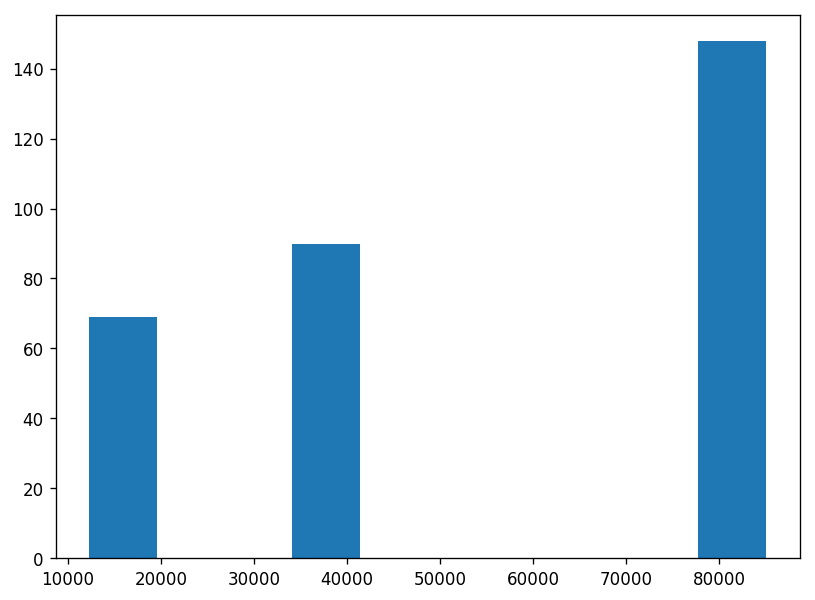

In [11]:
delta_times_seconds = [];
for tdelta in datetimes_small_del_L:
    delta_times_seconds.append(tdelta.seconds);
#print delta_times_seconds
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111)
plt.hist(delta_times_seconds)
plt.show()

In [12]:
#25 May 2009
start_date = datetime(2009,5,23,0,0,0);
end_date = datetime(2009,6,14,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  53
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_090524_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_090531_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_090607_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_090614_v1.03.ascii


In [13]:
output_data = ms.get_all_data_by_satellite();
burst_events = ms.get_burst_events(output_data);

eq_s = gps_particle_data.earthquake_search(start_date,end_date, min_magnitude=6,min_lat=-90,max_lat=90,min_lon=90,max_lon=180);

L_shells = eq_s.get_L_shells(500.0);
eq_datetimes = eq_s.get_datetimes();

datetimes_small_del_L = [];
eq = []

for ib, be in enumerate(burst_events):
    if(ib%20==0):
        print 'Burst #', ib, '/', len(burst_events);
        print 'Date : ', be.date;
        print 'L-shell : ', be.data['L_shell'];
   
    # Get the datetime spread
    pre_gap = timedelta(hours=-12);
    post_gap = timedelta(hours=12);
   
    start_date = be.date+pre_gap;
    end_date = be.date+post_gap;

    # Compare with EQs
    for i,info in enumerate(eq_s.earthquake_information):
        # Print the details of the Sumatran earthquake
        del_L = math.fabs(be.data['L_shell'] - L_shells[i]);
        del_time = eq_datetimes[i] - be.data['datetime'];
        time_test = (del_time<timedelta(days=10)) and (del_time>timedelta(days=-10));

        if( (del_L<0.1) and time_test):
            #print 'Matching EQ... '
            #print info;
            eq.append([be.data['datetime'], eq_datetimes[i], info[1]])
            #print 'L_shell: ', be.data['L_shell'], L_shells[i];
            datetimes_small_del_L.append(be.data['datetime'] - eq_datetimes[i]);

Burst # 0 / 1571
Date :  2009-05-24 01:08:00
L-shell :  6.257951
Burst # 20 / 1571
Date :  2009-05-24 03:24:00
L-shell :  4.859455
Burst # 40 / 1571
Date :  2009-05-24 08:32:00
L-shell :  4.557583
Burst # 60 / 1571
Date :  2009-05-24 10:36:00
L-shell :  6.338222
Burst # 80 / 1571
Date :  2009-05-24 15:48:00
L-shell :  4.693186
Burst # 100 / 1571
Date :  2009-05-24 19:16:00
L-shell :  5.415369
Burst # 120 / 1571
Date :  2009-05-24 21:48:00
L-shell :  5.89078
Burst # 140 / 1571
Date :  2009-05-25 02:00:00
L-shell :  4.441067
Burst # 160 / 1571
Date :  2009-05-25 07:44:00
L-shell :  6.004877
Burst # 180 / 1571
Date :  2009-05-25 09:52:00
L-shell :  4.840321
Burst # 200 / 1571
Date :  2009-05-25 13:44:00
L-shell :  5.600664
Burst # 220 / 1571
Date :  2009-05-25 16:04:00
L-shell :  5.205899
Burst # 240 / 1571
Date :  2009-05-25 19:08:00
L-shell :  5.529746
Burst # 260 / 1571
Date :  2009-05-25 21:44:00
L-shell :  5.893742
Burst # 280 / 1571
Date :  2009-05-26 01:44:00
L-shell :  4.63538
Bur

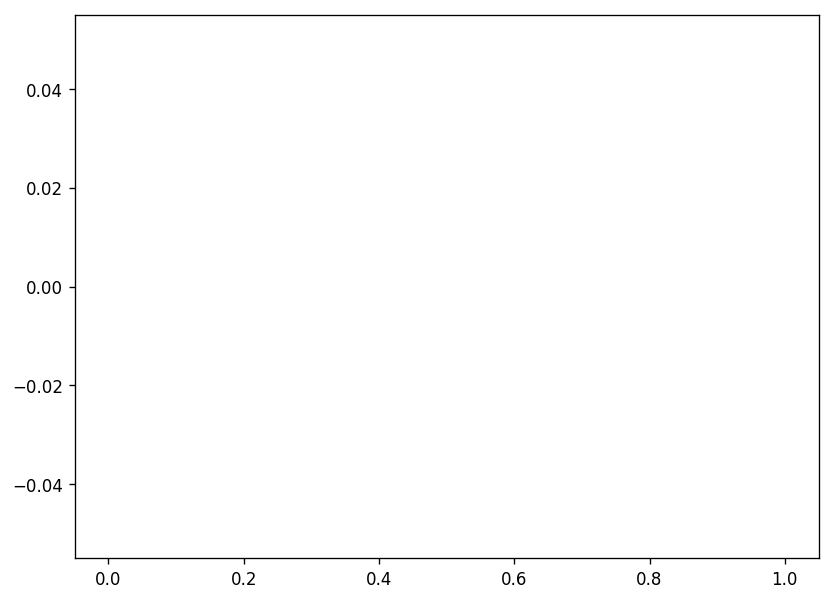

In [14]:
delta_times_seconds = [];
for tdelta in datetimes_small_del_L:
    delta_times_seconds.append(tdelta.seconds);
#print delta_times_seconds
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111)
plt.hist(delta_times_seconds)
plt.show()

In [15]:
#12 Feb 2013
start_date = datetime(2013,2,10,0,0,0);
end_date = datetime(2013,3,3,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  53
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130210_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130217_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130224_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130303_v1.03.ascii


In [16]:
output_data = ms.get_all_data_by_satellite();
burst_events = ms.get_burst_events(output_data);

eq_s = gps_particle_data.earthquake_search(start_date,end_date, min_magnitude=6,min_lat=-90,max_lat=90,min_lon=90,max_lon=180);

L_shells = eq_s.get_L_shells(500.0);
eq_datetimes = eq_s.get_datetimes();

datetimes_small_del_L = [];
eq = []

for ib, be in enumerate(burst_events):
    if(ib%20==0):
        print 'Burst #', ib, '/', len(burst_events);
        print 'Date : ', be.date;
        print 'L-shell : ', be.data['L_shell'];
   
    # Get the datetime spread
    pre_gap = timedelta(hours=-12);
    post_gap = timedelta(hours=12);
   
    start_date = be.date+pre_gap;
    end_date = be.date+post_gap;

    # Compare with EQs
    for i,info in enumerate(eq_s.earthquake_information):
        # Print the details of the Sumatran earthquake
        del_L = math.fabs(be.data['L_shell'] - L_shells[i]);
        del_time = eq_datetimes[i] - be.data['datetime'];
        time_test = (del_time<timedelta(days=10)) and (del_time>timedelta(days=-10));

        if( (del_L<0.1) and time_test):
            #print 'Matching EQ... '
            #print info;
            eq.append([be.data['datetime'], eq_datetimes[i], info[1]])
            #print 'L_shell: ', be.data['L_shell'], L_shells[i];
            datetimes_small_del_L.append(be.data['datetime'] - eq_datetimes[i]);

Burst # 0 / 5144
Date :  2013-02-12 18:38:00
L-shell :  4.448734
Burst # 20 / 5144
Date :  2013-02-12 21:50:00
L-shell :  8.086188
Burst # 40 / 5144
Date :  2013-02-12 23:10:00
L-shell :  4.351407
Burst # 60 / 5144
Date :  2013-02-13 00:30:00
L-shell :  4.63026
Burst # 80 / 5144
Date :  2013-02-13 04:42:00
L-shell :  5.446851
Burst # 100 / 5144
Date :  2013-02-13 06:02:00
L-shell :  4.400987
Burst # 120 / 5144
Date :  2013-02-13 10:58:00
L-shell :  6.031775
Burst # 140 / 5144
Date :  2013-02-13 12:18:00
L-shell :  4.260451
Burst # 160 / 5144
Date :  2013-02-13 13:38:00
L-shell :  5.818727
Burst # 180 / 5144
Date :  2013-02-13 17:30:00
L-shell :  4.660444
Burst # 200 / 5144
Date :  2013-02-13 18:50:00
L-shell :  4.703474
Burst # 220 / 5144
Date :  2013-02-13 22:18:00
L-shell :  5.868685
Burst # 240 / 5144
Date :  2013-02-13 23:38:00
L-shell :  4.138274
Burst # 260 / 5144
Date :  2013-02-14 00:58:00
L-shell :  5.854778
Burst # 280 / 5144
Date :  2013-02-14 05:26:00
L-shell :  4.493353
Bu

Burst # 3000 / 5144
Date :  2013-02-28 04:06:00
L-shell :  4.570883
Burst # 3020 / 5144
Date :  2013-02-28 05:26:00
L-shell :  4.721418
Burst # 3040 / 5144
Date :  2013-02-28 10:10:00
L-shell :  5.356661
Burst # 3060 / 5144
Date :  2013-02-28 11:30:00
L-shell :  4.31558
Burst # 3080 / 5144
Date :  2013-02-28 12:50:00
L-shell :  6.560047
Burst # 3100 / 5144
Date :  2013-02-28 16:50:00
L-shell :  4.351335
Burst # 3120 / 5144
Date :  2013-02-28 18:10:00
L-shell :  5.175137
Burst # 3140 / 5144
Date :  2013-02-28 21:46:00
L-shell :  4.762329
Burst # 3160 / 5144
Date :  2013-02-28 23:14:00
L-shell :  4.478949
Burst # 3180 / 5144
Date :  2013-03-01 03:42:00
L-shell :  5.193468
Burst # 3200 / 5144
Date :  2013-03-01 05:02:00
L-shell :  4.544207
Burst # 3220 / 5144
Date :  2013-03-01 10:14:00
L-shell :  5.191699
Burst # 3240 / 5144
Date :  2013-03-01 11:34:00
L-shell :  4.453155
Burst # 3260 / 5144
Date :  2013-03-01 15:46:00
L-shell :  6.236525
Burst # 3280 / 5144
Date :  2013-03-01 17:06:00
L

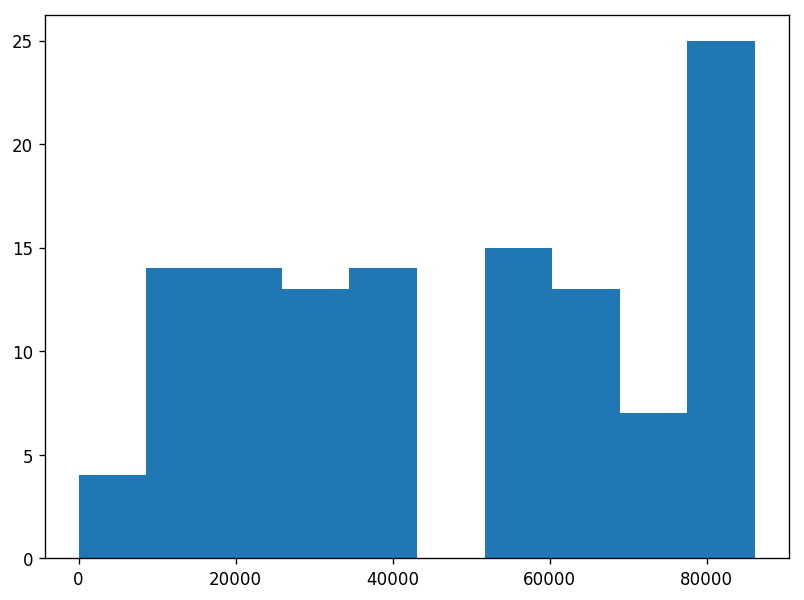

In [17]:
delta_times_seconds = [];
for tdelta in datetimes_small_del_L:
    delta_times_seconds.append(tdelta.seconds);
#print delta_times_seconds
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111)
plt.hist(delta_times_seconds)
plt.show()

In [18]:
#6 Jan 2016
start_date = datetime(2015,12,25,0,0,0);
end_date = datetime(2016,1,25,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  53
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_151227_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_160103_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_160110_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_160117_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_160124_v1.03.ascii


In [19]:
output_data = ms.get_all_data_by_satellite();
burst_events = ms.get_burst_events(output_data);

eq_s = gps_particle_data.earthquake_search(start_date,end_date, min_magnitude=6,min_lat=-90,max_lat=90,min_lon=90,max_lon=180);

L_shells = eq_s.get_L_shells(500.0);
eq_datetimes = eq_s.get_datetimes();

datetimes_small_del_L = [];
eq = []

for ib, be in enumerate(burst_events):
    if(ib%20==0):
        print 'Burst #', ib, '/', len(burst_events);
        print 'Date : ', be.date;
        print 'L-shell : ', be.data['L_shell'];
   
    # Get the datetime spread
    pre_gap = timedelta(hours=-12);
    post_gap = timedelta(hours=12);
   
    start_date = be.date+pre_gap;
    end_date = be.date+post_gap;

    # Compare with EQs
    for i,info in enumerate(eq_s.earthquake_information):
        # Print the details of the Sumatran earthquake
        del_L = math.fabs(be.data['L_shell'] - L_shells[i]);
        del_time = eq_datetimes[i] - be.data['datetime'];
        time_test = (del_time<timedelta(days=10)) and (del_time>timedelta(days=-10));

        if( (del_L<0.1) and time_test):
            #print 'Matching EQ... '
            #print info;
            eq.append([be.data['datetime'], eq_datetimes[i], info[1]])
            #print 'L_shell: ', be.data['L_shell'], L_shells[i];
            datetimes_small_del_L.append(be.data['datetime'] - eq_datetimes[i]);

Burst # 0 / 7415
Date :  2015-12-27 00:02:00
L-shell :  4.102745
Burst # 20 / 7415
Date :  2015-12-27 01:22:00
L-shell :  5.955577
Burst # 40 / 7415
Date :  2015-12-27 04:38:00
L-shell :  6.276064
Burst # 60 / 7415
Date :  2015-12-27 05:58:00
L-shell :  4.34447
Burst # 80 / 7415
Date :  2015-12-27 07:18:00
L-shell :  6.391698
Burst # 100 / 7415
Date :  2015-12-27 11:58:00
L-shell :  4.514475
Burst # 120 / 7415
Date :  2015-12-27 13:18:00
L-shell :  4.743078
Burst # 140 / 7415
Date :  2015-12-27 14:38:00
L-shell :  8.595907
Burst # 160 / 7415
Date :  2015-12-27 17:46:00
L-shell :  4.667121
Burst # 180 / 7415
Date :  2015-12-27 19:06:00
L-shell :  4.694196
Burst # 200 / 7415
Date :  2015-12-27 22:06:00
L-shell :  7.332836
Burst # 220 / 7415
Date :  2015-12-27 23:26:00
L-shell :  4.281522
Burst # 240 / 7415
Date :  2015-12-28 00:46:00
L-shell :  4.737655
Burst # 260 / 7415
Date :  2015-12-28 04:26:00
L-shell :  6.642812
Burst # 280 / 7415
Date :  2015-12-28 05:46:00
L-shell :  4.30899
Bur

L-shell :  4.548179
Burst # 3140 / 7415
Date :  2016-01-10 12:18:00
L-shell :  4.698326
Burst # 3160 / 7415
Date :  2016-01-10 15:46:00
L-shell :  7.569799
Burst # 3180 / 7415
Date :  2016-01-10 17:06:00
L-shell :  4.369001
Burst # 3200 / 7415
Date :  2016-01-10 18:26:00
L-shell :  5.151871
Burst # 3220 / 7415
Date :  2016-01-10 21:38:00
L-shell :  5.721869
Burst # 3240 / 7415
Date :  2016-01-10 22:58:00
L-shell :  4.11831
Burst # 3260 / 7415
Date :  2016-01-11 00:18:00
L-shell :  5.894843
Burst # 3280 / 7415
Date :  2016-01-11 03:54:00
L-shell :  5.329307
Burst # 3300 / 7415
Date :  2016-01-11 05:14:00
L-shell :  4.437533
Burst # 3320 / 7415
Date :  2016-01-11 09:46:00
L-shell :  7.855248
Burst # 3340 / 7415
Date :  2016-01-11 11:06:00
L-shell :  4.383257
Burst # 3360 / 7415
Date :  2016-01-11 12:26:00
L-shell :  4.991571
Burst # 3380 / 7415
Date :  2016-01-11 15:58:00
L-shell :  6.67208
Burst # 3400 / 7415
Date :  2016-01-11 17:18:00
L-shell :  4.379205
Burst # 3420 / 7415
Date :  20

Burst # 6080 / 7415
Date :  2016-01-24 16:10:00
L-shell :  4.374668
Burst # 6100 / 7415
Date :  2016-01-24 17:30:00
L-shell :  5.212273
Burst # 6120 / 7415
Date :  2016-01-24 20:54:00
L-shell :  5.202791
Burst # 6140 / 7415
Date :  2016-01-24 22:14:00
L-shell :  4.170887
Burst # 6160 / 7415
Date :  2016-01-24 23:34:00
L-shell :  6.778264
Burst # 6180 / 7415
Date :  2016-01-25 03:06:00
L-shell :  4.85383
Burst # 6200 / 7415
Date :  2016-01-25 04:26:00
L-shell :  4.43395
Burst # 6220 / 7415
Date :  2016-01-25 08:50:00
L-shell :  7.758612
Burst # 6240 / 7415
Date :  2016-01-25 10:10:00
L-shell :  4.369121
Burst # 6260 / 7415
Date :  2016-01-25 11:30:00
L-shell :  5.065094
Burst # 6280 / 7415
Date :  2016-01-25 14:50:00
L-shell :  6.847407
Burst # 6300 / 7415
Date :  2016-01-25 16:10:00
L-shell :  4.288268
Burst # 6320 / 7415
Date :  2016-01-25 17:30:00
L-shell :  5.246381
Burst # 6340 / 7415
Date :  2016-01-25 20:14:00
L-shell :  6.867055
Burst # 6360 / 7415
Date :  2016-01-25 21:34:00
L-

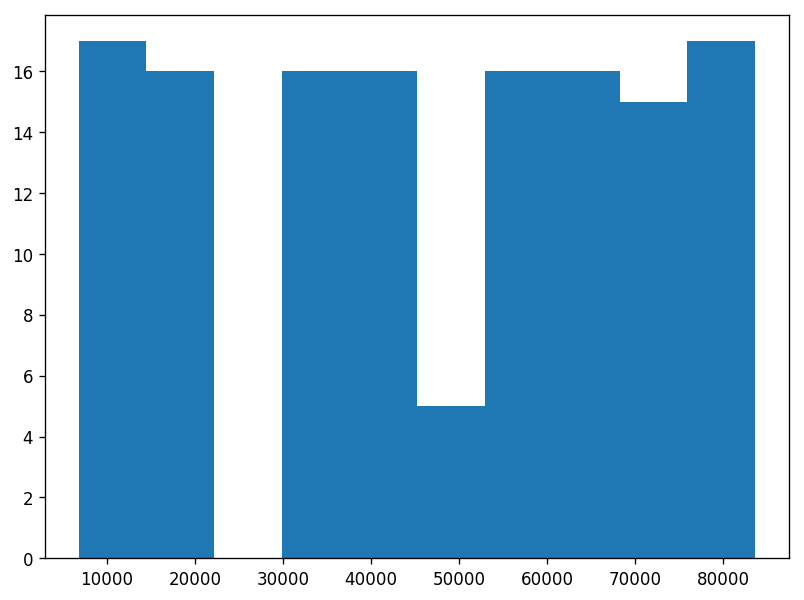

In [20]:
delta_times_seconds = [];
for tdelta in datetimes_small_del_L:
    delta_times_seconds.append(tdelta.seconds);
#print delta_times_seconds
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111)
plt.hist(delta_times_seconds)
plt.show()

In [21]:
#9 Sept Jan 2016
start_date = datetime(2016,9,4,0,0,0);
end_date = datetime(2016,9,28,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  53
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_160904_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_160911_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_160918_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_160925_v1.03.ascii


In [22]:
output_data = ms.get_all_data_by_satellite();
burst_events = ms.get_burst_events(output_data);

eq_s = gps_particle_data.earthquake_search(start_date,end_date, min_magnitude=6,min_lat=-90,max_lat=90,min_lon=90,max_lon=180);

L_shells = eq_s.get_L_shells(500.0);
eq_datetimes = eq_s.get_datetimes();

datetimes_small_del_L = [];
eq = []

for ib, be in enumerate(burst_events):
    if(ib%20==0):
        print 'Burst #', ib, '/', len(burst_events);
        print 'Date : ', be.date;
        print 'L-shell : ', be.data['L_shell'];
   
    # Get the datetime spread
    pre_gap = timedelta(hours=-12);
    post_gap = timedelta(hours=12);
   
    start_date = be.date+pre_gap;
    end_date = be.date+post_gap;

    # Compare with EQs
    for i,info in enumerate(eq_s.earthquake_information):
        # Print the details of the Sumatran earthquake
        del_L = math.fabs(be.data['L_shell'] - L_shells[i]);
        del_time = eq_datetimes[i] - be.data['datetime'];
        time_test = (del_time<timedelta(days=10)) and (del_time>timedelta(days=-10));

        if( (del_L<0.1) and time_test):
            #print 'Matching EQ... '
            #print info;
            eq.append([be.data['datetime'], eq_datetimes[i], info[1]])
            #print 'L_shell: ', be.data['L_shell'], L_shells[i];
            datetimes_small_del_L.append(be.data['datetime'] - eq_datetimes[i]);

Burst # 0 / 5628
Date :  2016-09-04 00:02:00
L-shell :  5.900277
Burst # 20 / 5628
Date :  2016-09-04 01:22:00
L-shell :  4.289167
Burst # 40 / 5628
Date :  2016-09-04 02:42:00
L-shell :  6.052636
Burst # 60 / 5628
Date :  2016-09-04 04:02:00
L-shell :  8.810867
Burst # 80 / 5628
Date :  2016-09-04 05:30:00
L-shell :  5.46571
Burst # 100 / 5628
Date :  2016-09-04 06:50:00
L-shell :  4.131928
Burst # 120 / 5628
Date :  2016-09-04 08:10:00
L-shell :  6.480004
Burst # 140 / 5628
Date :  2016-09-04 12:30:00
L-shell :  4.361345
Burst # 160 / 5628
Date :  2016-09-04 13:50:00
L-shell :  5.475298
Burst # 180 / 5628
Date :  2016-09-04 18:10:00
L-shell :  5.489369
Burst # 200 / 5628
Date :  2016-09-04 19:30:00
L-shell :  4.335401
Burst # 220 / 5628
Date :  2016-09-04 23:34:00
L-shell :  8.514251
Burst # 240 / 5628
Date :  2016-09-05 00:54:00
L-shell :  4.3546
Burst # 260 / 5628
Date :  2016-09-05 02:14:00
L-shell :  5.148538
Burst # 280 / 5628
Date :  2016-09-05 04:46:00
L-shell :  7.296212
Burs

Date :  2016-09-16 18:10:00
L-shell :  4.37151
Burst # 2500 / 5628
Date :  2016-09-16 19:30:00
L-shell :  5.1759
Burst # 2520 / 5628
Date :  2016-09-16 23:34:00
L-shell :  4.898638
Burst # 2540 / 5628
Date :  2016-09-17 00:54:00
L-shell :  4.488627
Burst # 2560 / 5628
Date :  2016-09-17 02:14:00
L-shell :  7.372902
Burst # 2580 / 5628
Date :  2016-09-17 05:14:00
L-shell :  4.452325
Burst # 2600 / 5628
Date :  2016-09-17 06:34:00
L-shell :  4.524615
Burst # 2620 / 5628
Date :  2016-09-17 10:38:00
L-shell :  6.020771
Burst # 2640 / 5628
Date :  2016-09-17 11:58:00
L-shell :  4.349246
Burst # 2660 / 5628
Date :  2016-09-17 13:18:00
L-shell :  6.783463
Burst # 2680 / 5628
Date :  2016-09-17 17:42:00
L-shell :  4.726136
Burst # 2700 / 5628
Date :  2016-09-17 19:02:00
L-shell :  4.583046
Burst # 2720 / 5628
Date :  2016-09-17 22:54:00
L-shell :  6.922006
Burst # 2740 / 5628
Date :  2016-09-18 00:14:00
L-shell :  4.315102
Burst # 2760 / 5628
Date :  2016-09-18 01:34:00
L-shell :  5.624133
Bur

Burst # 4940 / 5628
Date :  2016-09-28 17:30:00
L-shell :  4.306462
Burst # 4960 / 5628
Date :  2016-09-28 18:50:00
L-shell :  5.456866
Burst # 4980 / 5628
Date :  2016-09-28 23:10:00
L-shell :  4.45557
Burst # 5000 / 5628
Date :  2016-09-29 00:30:00
L-shell :  4.989372
Burst # 5020 / 5628
Date :  2016-09-29 03:26:00
L-shell :  6.496458
Burst # 5040 / 5628
Date :  2016-09-29 04:46:00
L-shell :  4.183165
Burst # 5060 / 5628
Date :  2016-09-29 06:06:00
L-shell :  5.095208
Burst # 5080 / 5628
Date :  2016-09-29 10:10:00
L-shell :  5.082366
Burst # 5100 / 5628
Date :  2016-09-29 11:30:00
L-shell :  4.497916
Burst # 5120 / 5628
Date :  2016-09-29 16:14:00
L-shell :  6.194504
Burst # 5140 / 5628
Date :  2016-09-29 17:34:00
L-shell :  4.280509
Burst # 5160 / 5628
Date :  2016-09-29 18:54:00
L-shell :  5.811222
Burst # 5180 / 5628
Date :  2016-09-29 22:50:00
L-shell :  4.709423
Burst # 5200 / 5628
Date :  2016-09-30 00:10:00
L-shell :  4.63332
Burst # 5220 / 5628
Date :  2016-09-30 02:50:00
L-

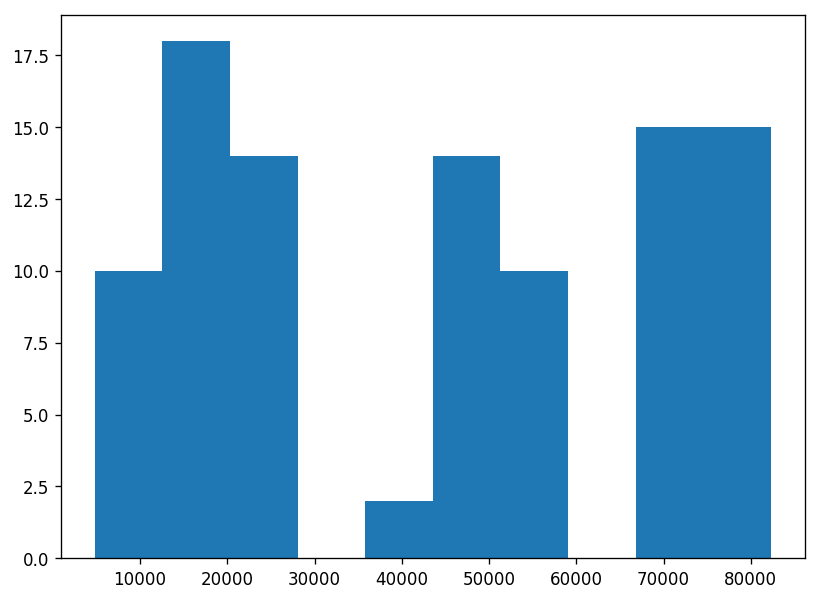

In [23]:
delta_times_seconds = [];
for tdelta in datetimes_small_del_L:
    delta_times_seconds.append(tdelta.seconds);
#print delta_times_seconds
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111)
plt.hist(delta_times_seconds)
plt.show()